# P02: Probability

## Problem 1: The Gaussian distribution

Let us assume, we measure two quantities $y_1, y_2$ at locations $x_1, x_2$. We know that our observations are independent and each follows a Gaussian distribution with means $\mu_1, \mu_2$ and standard deviations $\sigma_1, \sigma_2$, i.e. $$P(y_1)=\frac{1}{\sqrt{2\pi}\sigma_1}e^{-\frac{(y_1-\mu_1)^2}{2\sigma_1^2}},$$ and $$P(y_2)=\frac{1}{\sqrt{2\pi}\sigma_2}e^{-\frac{(y_2-\mu_2)^2}{2\sigma_2^2}}.$$ We have that $\mu_1=0, \mu_2=2, \sigma_1=0.5, \sigma_2=2$, and the setup is illustrated in the plot below.

(i) What is the joint distribution $P(y_1, y_2)$ of $y_1, y_2$? Write down its analytical form.

Since the observation from $y_1, y_2$ are independent, then $P(y_1, y_2) = P(y_1) \cdot P(y_2) = \frac{1}{\sqrt{2\pi}\sigma_1}e^{-\frac{(y_1-\mu_1)^2}{2\sigma_1^2}} \times \frac{1}{\sqrt{2\pi}\sigma_2}e^{-\frac{(y_2-\mu_2)^2}{2\sigma_2^2}} = \frac{1}{2\pi \sigma_1 \sigma_2}e^{-\frac{(y_1-\mu_1)^2}{2\sigma_1^2}-\frac{(y_2-\mu_2)^2}{2\sigma_2^2}}$

(ii) Use `numpy` to draw $n$ samples of $y^i_1, y^i_2$ from this distribution. You can start with $n=100$ and see what happens if you increase $n$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mu_1 = 0
sigma_1 = 0.5
mu_2 = 2
sigma_2 = 2
n = 10000
y1_sample = np.random.normal(loc=mu_1, scale=sigma_1, size=n)
y2_sample = np.random.normal(loc=mu_2, scale=sigma_2, size=n)
#Here I think the approach of Marek is the correct one, because now the gaussian distribution is multi-variable

(iii) Use `matplotlib` to plot histograms of the samples. In particular, plot both the 2D histogram for $y_1, y_2$, as well as the two 1D histograms for $y_1$ and $y_2$.


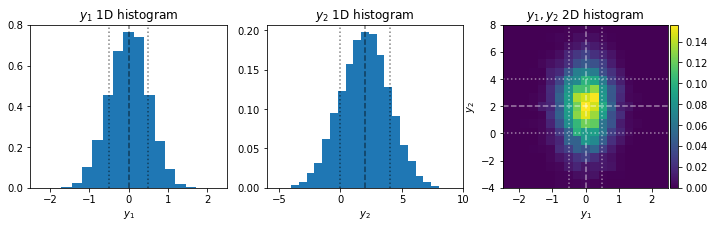

In [3]:
fig, axes = plt.subplots(ncols=3, figsize=(12,3))
im0 = axes[0].hist(y1_sample, bins=np.linspace(-2.5, 2.5, 20), density=True)
im1 = axes[1].hist(y2_sample, bins=np.linspace(-4, 8, 20), density=True)
im2 = axes[2].hist2d(y1_sample, y2_sample, bins=[np.linspace(-2.5, 2.5, 20), np.linspace(-4, 8, 20)], density=True)

axes[0].axvline(x=mu_1, linestyle='--', color='k', alpha=0.5)
axes[0].axvline(x=mu_1+sigma_1, linestyle=':', color='k', alpha=0.5)   
axes[0].axvline(x=mu_1-sigma_1, linestyle=':', color='k', alpha=0.5)   
axes[0].set_xlim(-2.5, 2.5) # [xmin, xmax, ymin, ymax]
axes[0].set_xlabel('$y_1$')
axes[0].set_title('$y_1$ 1D histogram')

axes[1].axvline(x=mu_2, linestyle='--', color='k', alpha=0.5)
axes[1].axvline(x=mu_2+sigma_2, linestyle=':', color='k', alpha=0.5)   
axes[1].axvline(x=mu_2-sigma_2, linestyle=':', color='k', alpha=0.5)   
axes[1].set_xlim(-6, 10) # [xmin, xmax, ymin, ymax]
axes[1].set_xlabel('$y_2$')
axes[1].set_title('$y_2$ 1D histogram')

axes[2].axvline(x=mu_1, linestyle='--', color='w', alpha=0.5)
axes[2].axvline(x=mu_1+sigma_1, linestyle=':', color='w', alpha=0.5)   
axes[2].axvline(x=mu_1-sigma_1, linestyle=':', color='w', alpha=0.5)
axes[2].axhline(y=mu_2, linestyle='--', color='w', alpha=0.5)
axes[2].axhline(y=mu_2+sigma_2, linestyle=':', color='w', alpha=0.5)   
axes[2].axhline(y=mu_2-sigma_2, linestyle=':', color='w', alpha=0.5)   
axes[2].set_xlabel('$y_1$')
axes[2].set_ylabel('$y_2$')
axes[2].set_title('$y_1, y_2$ 2D histogram')
plt.colorbar(im2[3], pad=0.01)

plt.show()


(iv) Use `matplotlib` to obtain a contour plot from the 2D samples. Overplot it on your 2D historgram and compare.


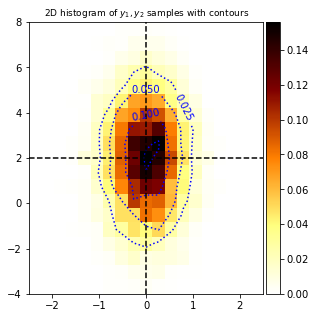

In [4]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

y1y2_hist2d = ax.hist2d(y1_sample, y2_sample, bins=[np.linspace(-2.5, 2.5, 20), np.linspace(-4, 8, 20)], density=True, cmap='afmhot_r')

dx = (2.5-(-2.5))/20
dy = (8-(-4))/20
x = np.linspace(-2.5+dx/2, 2.5-dx/2, 19)
y = np.linspace(-4+dy/2, 8-dy/2, 19)
X, Y = np.meshgrid(x, y)
contour = ax.contour(X, Y, y1y2_hist2d[0].T, levels=[0.025, 0.05, 0.1, 0.15], colors='b', linestyles='dotted')
ax.clabel(contour, fmt='%2.3f', colors='b', fontsize=10)
plt.colorbar(y1y2_hist2d[3], pad=0.01)

ax.axhline(y=mu_2, linestyle='--', color='k')
ax.axvline(x=mu_1, linestyle='--', color='k')
ax.set_title('2D histogram of $y_1, y_2$ samples with contours', fontsize=9)

plt.show()


(v) Derive an analytic expectation for the 1D histograms of $y_1$ and $y_2$ (what distribution are you plotting in this case?). Compare to your findings above. 


suppose n samples of $y_1$ are $y_1^1, y_1^2, ..., y_1^n$, then expectation value of $y_1$ samples is 
$$\langle y_1 \rangle = \langle \frac{1}{n}\sum_{i=1}^n y_1^i \rangle = \frac{1}{n}\sum_{i=1}^n \langle y_1^i \rangle$$

since each sample of $y_1^i$ is drew from distribution $P(y_1)=\frac{1}{\sqrt{2\pi}\sigma_1}e^{-\frac{(y_1-\mu_1)^2}{2\sigma_1^2}}$, where $\mu_1=0$, $\sigma_1$=0.5, 

then expectation of each sample $y_1^i$: $\langle y_1^i \rangle$ = $\mu_1$ = 0

Therefore, expectation of n samples of $y_1$ is $$\langle y_1 \rangle = \frac{1}{n}\sum_{i=1}^n \langle y_1^i \rangle = \frac{1}{n}\sum_{i=1}^n \mu_1 = 0 $$

Similarly, for n samples of $y_2$ $y_2^1, y_2^2, ..., y_2^n$, expectation of $y_2$ samples is 
$$\langle y_2 \rangle =  \frac{1}{n}\sum_{i=1}^n \mu_2 = \frac{1}{n} \cdot 2n = 2 $$

In [5]:
# expectation of y1 and y2 samples
np.nanmean(y1_sample), np.nanmean(y2_sample)

(-0.002157170844643047, 1.996235609660736)

Values of expectation computed above from $y_1, y_2$ samples is close to the analytical expectation value $\langle y_1 \rangle =0, \langle y_2 \rangle = 2$.

(vi) Let us now assume that we are actually not interested in $y_1, y_2$ but in a linear transformation of these variables, $z_1, z_2$ defined as $$\boldsymbol{z}=A\boldsymbol{y},$$ where $$A=\begin{pmatrix}
1 & 0.2  \\
0.2 & 1 
\end{pmatrix}.$$ Using these new samples, repeat problems (i) to (v). What has changed compared to before? 

**Hint:** For (v) you can use the analytic expression for the 2D Gaussian we have discussed in class, i.e. $$\mathcal{N}(\boldsymbol{y}) = \frac{1}{\sqrt{(2\pi)^2|C|}}e^{-\frac{1}{2}(\boldsymbol{y}-\boldsymbol{\mu})^TC^{-1}(\boldsymbol{y}-\boldsymbol{\mu})},$$ with $$C = \begin{pmatrix}
\sigma^2_1 & r\sigma_1\sigma_2  \\
r\sigma_1\sigma_2 & \sigma^2_2 
\end{pmatrix}.$$

(i) What is the joint distribution $P(z_1, z_2)$ of $z_1, z_2$? Write down its analytical form.

With $\boldsymbol{z}=A\boldsymbol{y},$ where $A=\begin{pmatrix}
1 & 0.2  \\
0.2 & 1 
\end{pmatrix},$ $$ z_1 = y_1 + 0.2 y_2, \\ z_2 = 0.2 y_1 + y_2 .$$

Then with $\mu_1=0, \mu_2=2, \sigma_1=0.5, \sigma_2=2$,
$$\mu_{z_1} = \langle z_1 \rangle = \langle y_1 + 0.2 y_2 \rangle = \langle y_1 \rangle + 0.2 \langle y_2 \rangle = 0.4$$
$$\mu_{z_2} = \langle z_2 \rangle = \langle 0.2 y_1 + y_2 \rangle = 0.2\langle y_1 \rangle + \langle y_2 \rangle = 2$$
$$\sigma_{z_1} = \langle (z_1-\mu_{z_1})^2 \rangle = \langle (y_1+0.2y_2-0.4)^2 \rangle = \sigma_{y_1}^2+0.2^2\sigma_{y_2}^2+0.4\langle y_1y_2\rangle = 0.41$$
$$\sigma_{z_2} = \langle (z_2-\mu_{z_2})^2 \rangle = \langle (0.2y_1+y_2-2)^2 \rangle = 0.2^2\sigma_{y_1}^2+\sigma_{y_2}^2+0.4\langle y_1y_2\rangle = 4.01$$

covariance $$Cov(z_1, z_2) = Cov(y_1+0.2y_2, 0.2y_1+y_2) = 0.2Cov(y_1,y_1)+Cov(y_1,y_2)+0.2\cdot 0.2Cov(y_2,y_1)+0.2Cov(y_2,y_2)=0.85$$

For $\vec{z}=\begin{pmatrix}
z_1  \\
z_2 
\end{pmatrix}$, $\vec{\mu_z}=\begin{pmatrix}
0.4  \\
2 
\end{pmatrix}$, $C=\begin{pmatrix}
0.41 & 0.85 \\
0.85 & 4.01
\end{pmatrix}$.
Then $|C|=0.9216$, $C^{-1}=\begin{pmatrix}
4.35 &  -0.92\\
-0.92 & 0.45
\end{pmatrix}$.
$$f(z_1,z_2)=\mathcal{N}(\vec{z})=\frac{1}{\sqrt{(2\pi)^2|C|}}e^{-\frac{1}{2}(\vec{z}-\vec{\mu})^TC^{-1}(\vec{z}-\vec{\mu})} = \frac{1}{2\pi\sqrt{0.9216}}e^{-\frac{1}{2}\begin{pmatrix}
z_1 -0.4  \\
z_2 -2
\end{pmatrix}^T\begin{pmatrix}
4.35 &  -0.92\\
-0.92 & 0.45
\end{pmatrix}\begin{pmatrix}
z_1 -0.4  \\
z_2 -2
\end{pmatrix}}$$


(ii) Use `numpy` to draw $n$ samples of $z^i_1, z^i_2$ from this distribution. You can start with $n=100$ and see what happens if you increase $n$.


In [6]:
mu_1 = 0
sigma_1 = 0.5
mu_2 = 2
sigma_2 = 2
n = 10000
y1_sample = np.random.normal(loc=mu_1, scale=sigma_1, size=n)
y2_sample = np.random.normal(loc=mu_2, scale=sigma_2, size=n)

# compute z1 z2 value from y1, y2
z1_sample = y1_sample + 0.2*y2_sample
z2_sample = 0.2*y1_sample + y2_sample


(iii) Use `matplotlib` to plot histograms of the samples. In particular, plot both the 2D histogram for $z_1, z_2$, as well as the two 1D histograms for $z_1$ and $z_2$.


In [7]:
def Gaussian_1d(x, mu, sigma):
    y = 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-((x-mu)**2/2*sigma**2))
    return y

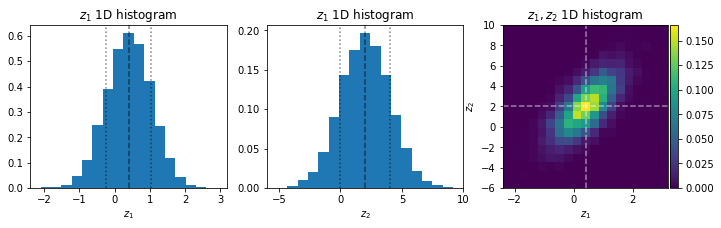

In [8]:
fig, axes = plt.subplots(ncols=3, figsize=(12,3))
im0 = axes[0].hist(z1_sample, bins=np.linspace(-2.4, 3.2, 20), density=True)
im1 = axes[1].hist(z2_sample, bins=np.linspace(-6, 10, 20), density=True)
im2 = axes[2].hist2d(z1_sample, z2_sample, bins=[np.linspace(-2.4, 3.2, 20), np.linspace(-6, 10, 20)], density=True)

mu_z1 = mu_1+0.2*mu_2
sigma_z1 = np.sqrt(sigma_1**2+0.2**2*sigma_2**2)
axes[0].axvline(x=mu_z1, linestyle='--', color='k', alpha=0.5)
axes[0].axvline(x=mu_z1+sigma_z1, linestyle=':', color='k', alpha=0.5)   
axes[0].axvline(x=mu_z1-sigma_z1, linestyle=':', color='k', alpha=0.5)   
axes[0].set_xlim(-2.4, 3.2) # [xmin, xmax, ymin, ymax]
axes[0].set_xlabel('$z_1$')
axes[0].set_title('$z_1$ 1D histogram')

mu_z2 = 0.2*mu_1+mu_2
sigma_z2 = np.sqrt(0.2**2*sigma_1**2+sigma_2**2)
axes[1].axvline(x=0.2*mu_1+mu_2, linestyle='--', color='k', alpha=0.5)
axes[1].axvline(x=mu_z2+sigma_z2, linestyle=':', color='k', alpha=0.5)   
axes[1].axvline(x=mu_z2-sigma_z2, linestyle=':', color='k', alpha=0.5)   
axes[1].set_xlim(-6, 10) # [xmin, xmax, ymin, ymax]
axes[1].set_xlabel('$z_2$')
axes[1].set_title('$z_1$ 1D histogram')

axes[2].axvline(x=mu_z1, linestyle='--', color='w', alpha=0.5)
axes[2].axhline(y=mu_z2, linestyle='--', color='w', alpha=0.5)
axes[2].set_xlabel('$z_1$')
axes[2].set_ylabel('$z_2$')
axes[2].set_title('$z_1, z_2$ 1D histogram')
plt.colorbar(im2[3], pad=0.01)

plt.show()


(iv) Use `matplotlib` to obtain a contour plot from the 2D samples. Overplot it on your 2D historgram and compare.


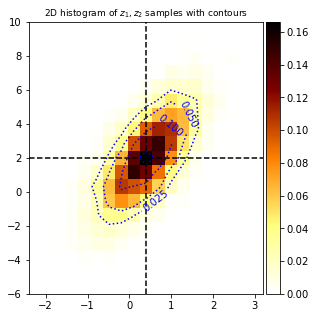

In [9]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

z1z2_hist2d = ax.hist2d(z1_sample, z2_sample, bins=[np.linspace(-2.4, 3.2, 20), np.linspace(-6, 10, 20)], density=True, cmap='afmhot_r')

dx = (3.2-(-2.4))/20
dy = (10-(-6))/20
x = np.linspace(-2.4+dx/2, 3.2-dx/2, 19)
y = np.linspace(-6+dy/2, 10-dy/2, 19)
X, Y = np.meshgrid(x, y)
contour = ax.contour(X, Y, z1z2_hist2d[0].T, levels=[0.025, 0.05, 0.1, 0.15], colors='b', linestyles='dotted')
ax.clabel(contour, fmt='%2.3f', colors='b', fontsize=10)
plt.colorbar(z1z2_hist2d[3], pad=0.01)

ax.axhline(y=mu_z2, linestyle='--', color='k')
ax.axvline(x=mu_z1, linestyle='--', color='k')
ax.set_title('2D histogram of $z_1, z_2$ samples with contours', fontsize=9)

plt.show()

#Plots
for i in n:
    sample=plotting(sampling(u,sigma,i), i)#Plots
for i in n:
    sample=plotting(sampling(u,sigma,i), i)
(v) Derive an analytic expectation for the 1D histograms of $z_1$ and $z_2$ (what distribution are you plotting in this case?). Compare to your findings above. 


$$\mu_{z_1} = \langle z_1 \rangle = \langle y_1 + 0.2 y_2 \rangle = \langle y_1 \rangle + 0.2 \langle y_2 \rangle = 0.4$$
$$\mu_{z_2} = \langle z_2 \rangle = \langle 0.2 y_1 + y_2 \rangle = 0.2\langle y_1 \rangle + \langle y_2 \rangle = 2$$


In [10]:
# compare with expectation of z1 and z2 samples
np.nanmean(z1_sample), np.nanmean(z2_sample)

(0.40758051852227256, 2.032109192217306)

## Problem 2: The Monty Hall problem (taken from MacKay)

On a game show, a contestant is told the rules as follows:

There are three doors, labeled 1, 2, 3. A single prize has been hidden behind one of them. You get to select one door. Initially your chosen door will not be opened. Instead, the gameshow host will open one of the other two doors, and he will do so in such a way as not to reveal the prize. For example, if you first choose door 1, he will then open one of doors 2 and 3, and it is guaranteed that he will choose which one to open so that the prize will not be revealed.

At this point, you will be given a fresh choice of door: you can either stick with your first choice, or you can switch to the other closed door. All the doors will then be opened and you will receive whatever is behind your final choice of door.
Imagine that the contestant chooses door 1 first; then the gameshow host opens door 3, revealing nothing behind the door, as promised. 

Should the contestant 

(i) stick with door 1, 

(ii) switch to door 2, 

(ii) or does it make no difference?

Explain your solution and reasoning.

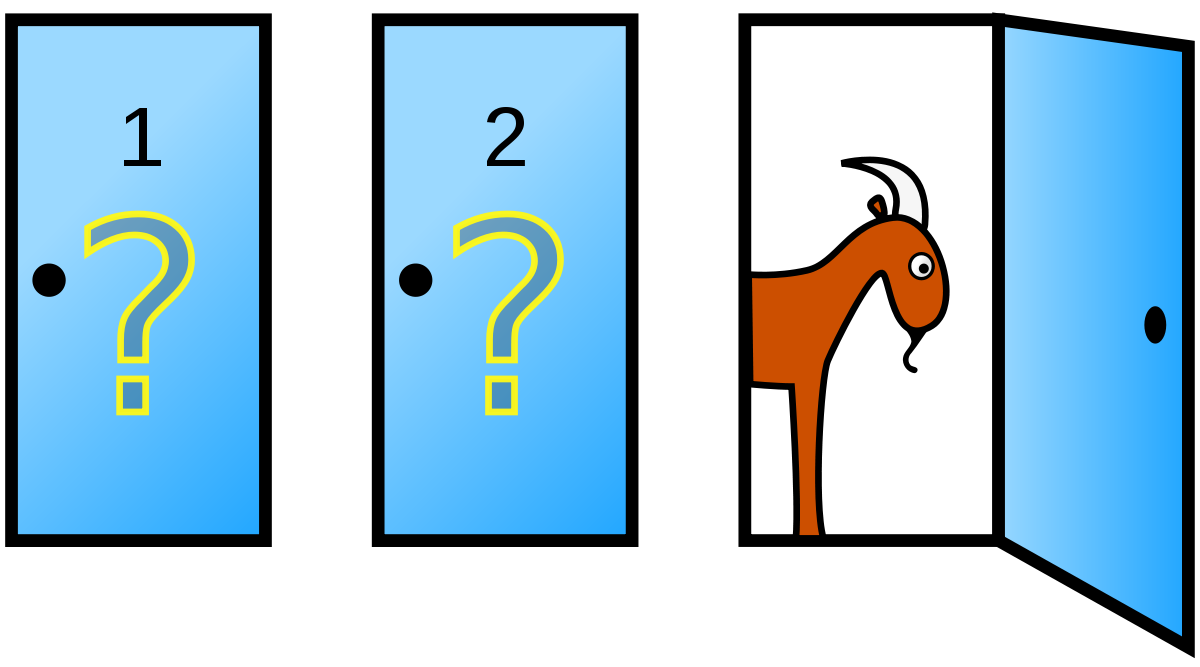